# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np

In [4]:
houses = pd.read_csv(r'C:\Users\USUARIO\Desktop\IRONHACK\repos\lab-problems-in-ml\data\boston_data.csv')

In [9]:
houses.shape

(404, 14)

In [5]:
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


- **crim**: Tasa de criminalidad per cápita por ciudad.
- **zn**: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
- **indus**: Proporción de acres comerciales no minoristas por ciudad.
- **chas**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
- **nox**: Concentración de óxidos nítricos (partes por 10 millones).
- **rm**: Número promedio de habitaciones por vivienda.
- **age**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- **dis**: Distancias ponderadas a cinco centros de empleo de Boston.
- **rad**: Índice de accesibilidad a carreteras raos en $1000.


- **tax**: Tasa de impuesto a la propiedad de valor total por $10,000.

- **ptratio**: Proporción alumno-profesor por localidad.  
- **black**: Proporción de negros por ciudad.  
- **lstat**: Porcentaje de población de estatus bajo.  
- **medv**: Valor medio de las viviendas ocupadas por sus propietarios en 1000$.  


In [7]:
houses.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [25]:
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


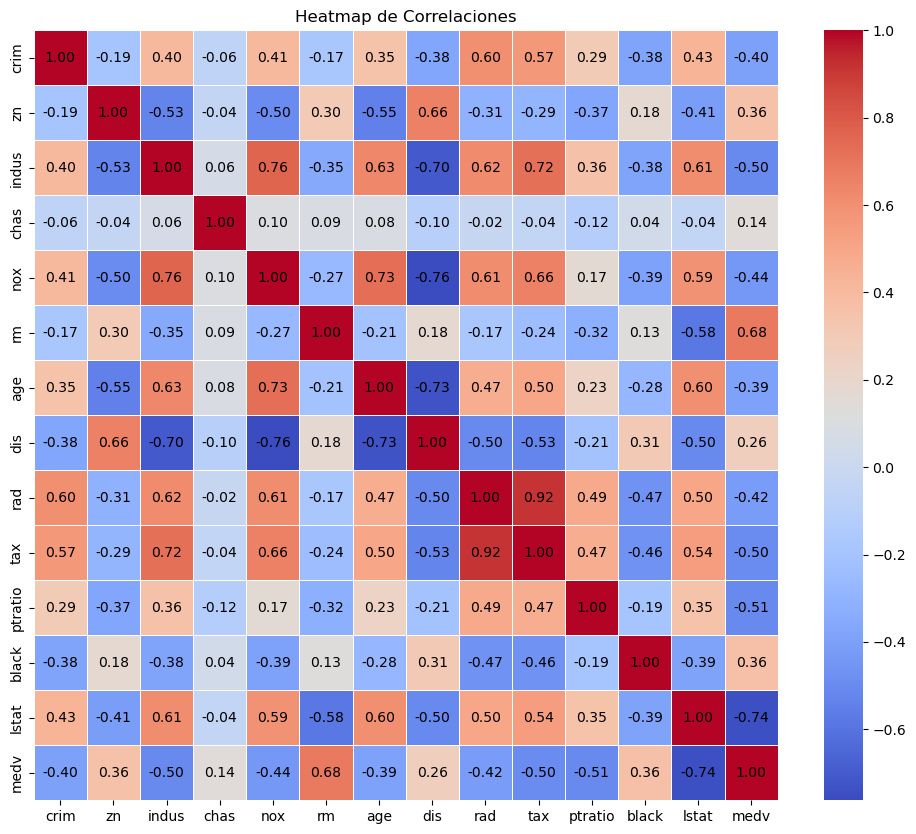

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def annotate_heatmap(ax, correlation_matrix):
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                    ha='center', va='center', color='black')

correlation_matrix = houses.corr()

plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
annotate_heatmap(ax, correlation_matrix)
plt.title('Heatmap de Correlaciones')
plt.show()




### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

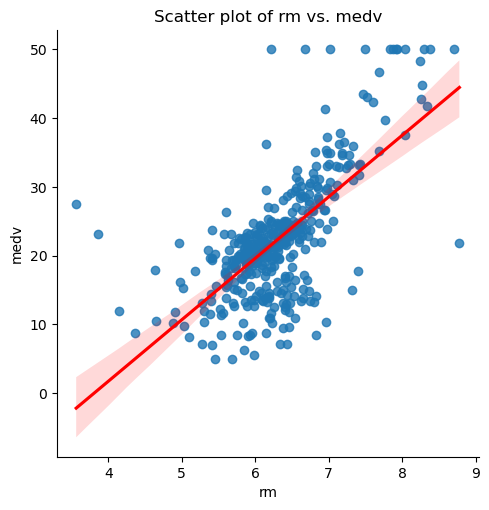

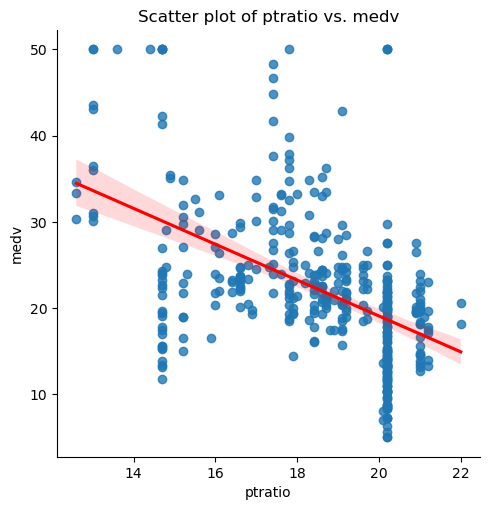

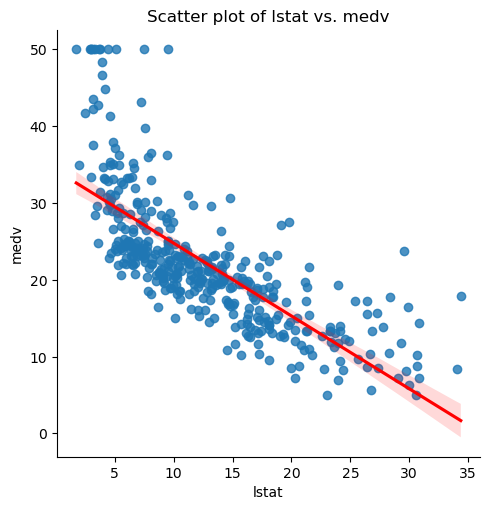

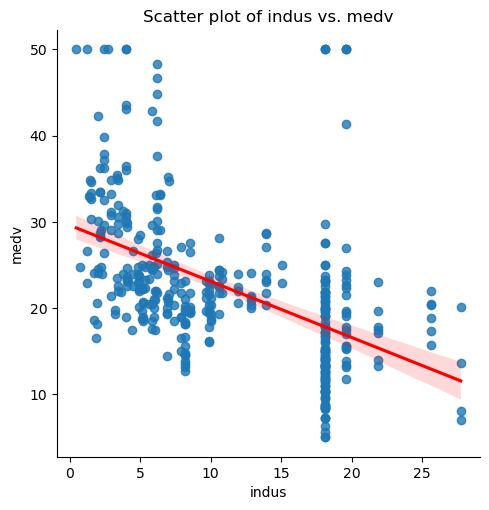

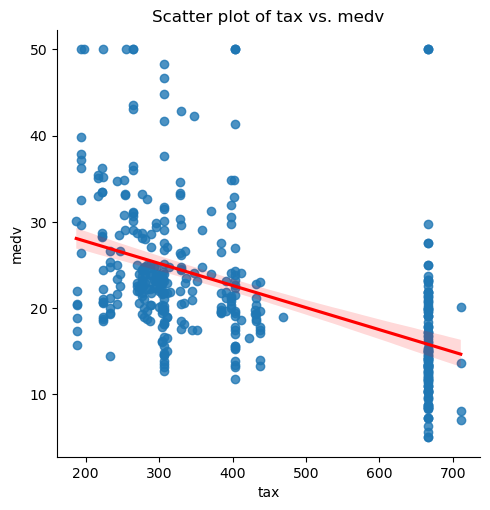

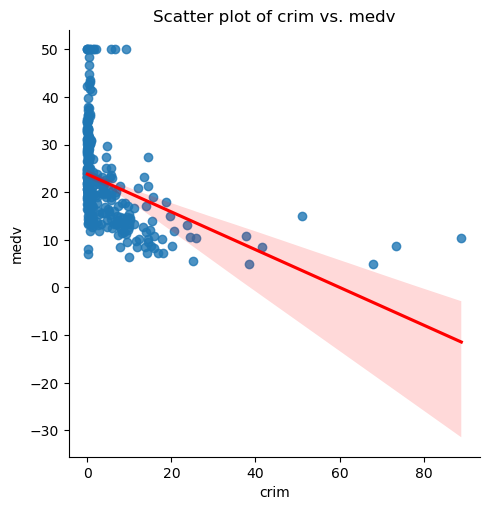

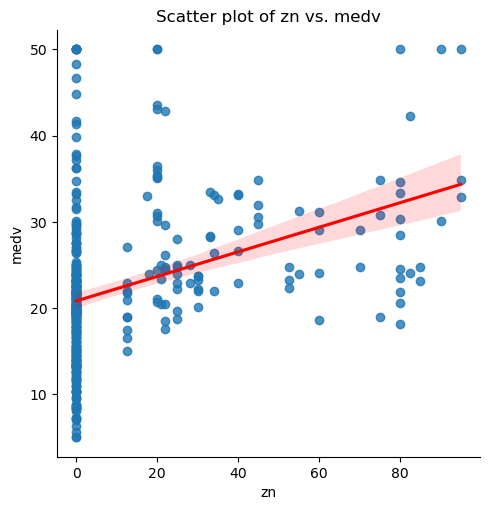

In [17]:

selected_vars = ['rm', 'ptratio', 'lstat', 'indus', 'tax', 'crim', 'zn']

def annotate_heatmap(ax, correlation_matrix):
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                    ha='center', va='center', color='black')
            
for var in selected_vars:
    sns.lmplot(x=var, y='medv', data=houses, line_kws={'color': 'red'})
    plt.title(f'Scatter plot of {var} vs. medv')
    plt.xlabel(var)
    plt.ylabel('medv')
    plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

These relationships align with common expectations. Variables such as the number of rooms, pupil-teacher ratio, percentage of lower-status population, and crime rate are typically known to influence home prices, and the scatter plots confirm these expectations. 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

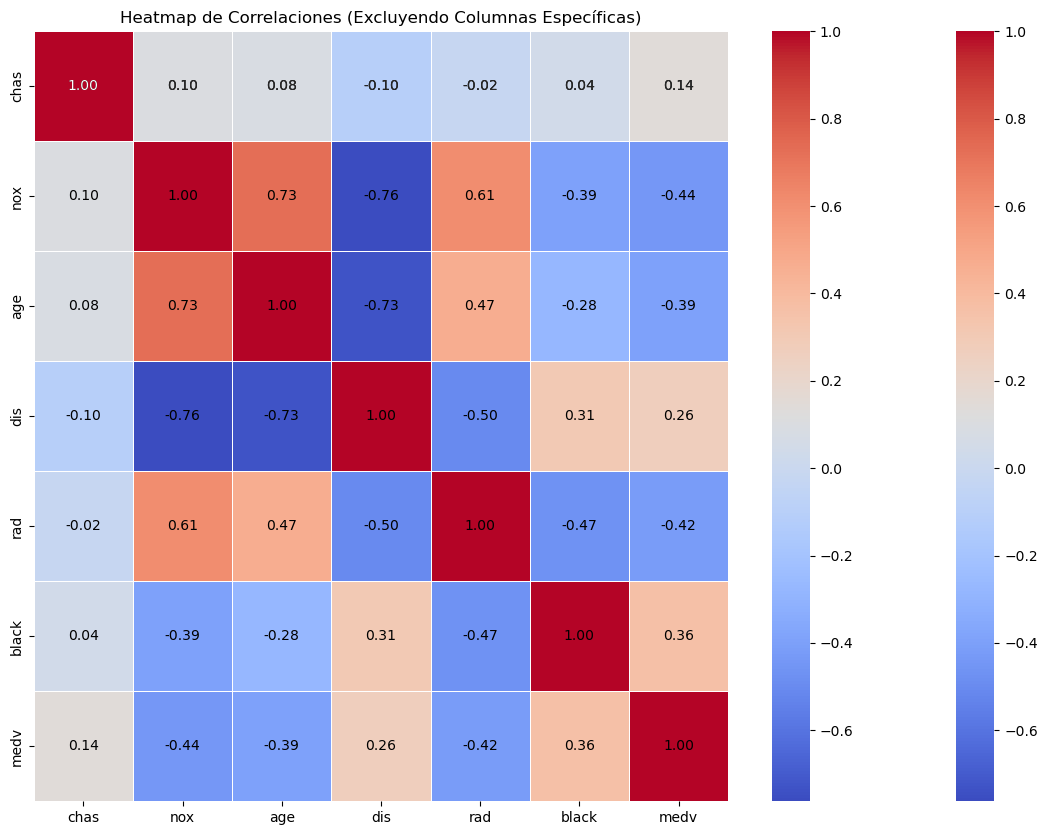

In [23]:
selected_cols = [col for col in houses.columns if col not in ['rm', 'ptratio', 'lstat', 'indus', 'tax', 'crim', 'zn']]

selected_data = houses[selected_cols]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(14, 10))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
annotate_heatmap(ax, correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlaciones (Excluyendo Columnas Específicas)')
plt.show()


Nox (Nitric oxide concentration (parts per 10 million)) does correlate negatively -0.44 with medv, as well as age -0.39 and rad -0.42

Nox also correlates with age (Proportion of owner-occupied units built before 1940), negatively with dis (Weighted distances to five Boston employment centers), and with rad (Accessibility index to radial highways in $1000)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [26]:
houses['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [27]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [29]:
from sklearn.model_selection import train_test_split

X = houses.drop('medv', axis=1)
y = houses['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [30]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

max_depth_values = [2, 4, 6, 8, 10]

models = []

for max_depth in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    model.fit(X_train, y_train)
    
    models.append(model)

Now, plot the score for each tree on the training set and on the testing set.

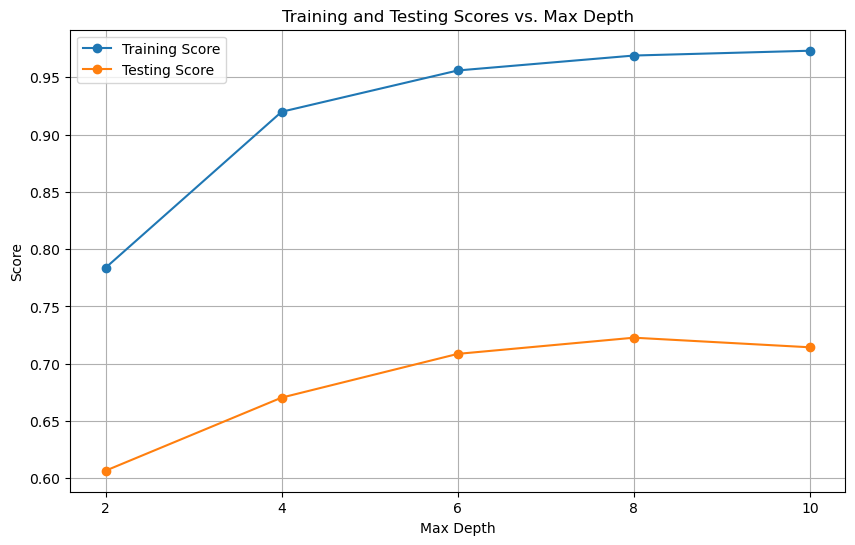

In [31]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

for model in models:
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Training Score', marker='o')
plt.plot(max_depth_values, test_scores, label='Testing Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Training and Testing Scores vs. Max Depth')
plt.legend()
plt.grid(True)
plt.xticks(max_depth_values)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

The plot illustrates the importance of tuning the max_depth parameter to find the optimal balance between bias and variance, thereby maximizing the model's performance on unseen data.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

Low max_depth (1) → High Bias: The model is too simple and cannot capture the underlying patterns in the data, leading to high bias.  
High max_depth (10) → High Variance: The model is too complex and captures noise along with the underlying patterns, leading to high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(max_depth=6, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE) with max_depth=6:", mse)

Mean Squared Error (MSE) with max_depth=6: 13.762876410282304


An MSE of 13.76 suggests that the model has a moderate level of error, but there may still be room for improvement

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

The model constructed using data from 1978 may not be directly applicable in today's real-world setting due to potential changes in housing market dynamics, demographics, and urban development patterns over time. Additionally, the features present in the dataset may not fully capture all relevant factors influencing home prices, such as location-specific amenities, economic conditions, or housing market trends. The model's robustness and consistency in making predictions may also be questionable, especially when applied to different geographic regions or urban versus rural settings where housing market dynamics may vary significantly. Therefore, while the model may provide some insights, it should be used cautiously and ideally supplemented with more recent and comprehensive data for real-world applications.